# FIT5197 2024 S1 Final Assessment



**YOUR NAME**: Anish S

**STUDENT ID**: 34113339

**KAGGLE NAME/ID** : Anish_101201

Please also enter your details in this [google form](https://forms.gle/isxqfrVnV7ddAj8y8).

**NOTE:**
- I've originally built my regression and classification models using kaggle notebook. The performance measures computed for each of the XGBoost models built are slightly different from what I obtained on kaggle despite the use of seed measures to keep the output fixed (reproducability). But this must not affect my final predictions too much.

# Part 1 Regression (50 Marks)

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual. You need to build regression models to optimally predict the variable in the survey dataset called 'happiness' based on any, or all, of the other survey question responses.

You have been provided with two datasets, ```regression_train.csv``` and ```regression_test.csv```. Using these datasets, you hope to build a model that can predict happiness level using the other variables. ```regression_train.csv``` comes with the ground-truth target label (i.e. happiness level) whereas `regression_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict happiness. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. e.g., the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

In [170]:
# Reading the datasets
train_data <- read.csv('regression_train.csv')
test_data <- read.csv('regression_test.csv')

In [171]:
summary(train_data)

    gender             income         
 Length:500         Length:500        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
 whatIsYourHeightExpressItAsANumberInMetresM
 Length:500                                 
 Class :character                           
 Mode  :character                           
                                            
                                            
                                            
 doYouFeelASenseOfPurposeAndMeaningInYourLife104
 Length:500                                     
 Class :character                               
 Mode  :character                               
                                                
                                                
                                                
 howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki
 Len

In [172]:
str(test_data)

'data.frame':	90 obs. of  42 variables:
 $ gender                                                         : chr  "Female" "Female" "Female" "Female" ...
 $ income                                                         : chr  "0 - 10k" "0 - 10k" "20k - 50k" "50k - 80k" ...
 $ whatIsYourHeightExpressItAsANumberInMetresM                    : chr  "170 - 175" "160 - 165" "170 - 175" "160 - 165" ...
 $ doYouFeelASenseOfPurposeAndMeaningInYourLife104                : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki: chr  "They complement each other" "They complement each other" "They complement each other" "They complement each other" ...
 $ howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends      : chr  "Sometimes" "Rarely" "Sometimes" "Rarely" ...
 $ doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded    : chr  "Yes, I have both" "No" "Yes, I have both" "Yes, I have both" ...
 $ howOftenDoYouParticipateInSocialActivitiesIncl

**PLEASE NOTE THAT THE USE OF LIBRARIES ARE PROHIBITED IN THESE QUESTIONS UNLESS STATED OTHERWISE, ANSWERS USING LIBRARIES WILL RECEIVE 0 MARKS**

## Question 1 (NO LIBRARIES ALLOWED) (4 Mark)
Please load the ```regression_train.csv``` and fit a [$\textbf{multiple linear regression model}$](https://en.wikipedia.org/wiki/Linear_regression) with 'happiness' being the target variable. According to the summary table, which predictors do you think are possibly associated with the target variable (use the significance level of 0.01), and which are the **Top 5** strongest predictors? Please write an R script to automatically fetch and print this information.

**NOTE**: Manually doing the above tasks will result in 0 marks.

In [174]:
# Fit a multiple linear regression model with 'happiness' as the target variable
qn1_model <- lm(happiness ~ ., data = train_data)

# Get the summary of the model
model_summary <- summary(qn1_model)

model_summary


Call:
lm(formula = happiness ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.1452  -3.9453   0.3826   4.4246  21.9552 

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 -22.13827
genderMale                                                                                   -0.37455
genderOther                                                                                  -1.26593
income10k - 15k                                                                               6.26812
income120k - 150k                                                                            11.37302
income150k - 200k                                                                            11.71840
income15k - 20k                                                                              15.44791
income200k 

In [175]:
# Extract the coefficients table
coefficients_table <- model_summary$coefficients

# Extract the p-values for all predictors
p_values <- coefficients_table[, 4]

# Get the names of the predictors
predictor_names <- rownames(coefficients_table)

# Combine the predictor names and their p-values into a data frame
predictor_p_values <- data.frame(predictor = predictor_names, p_value = p_values)

# Sort the predictors by p-values in ascending order (smallest first)
sorted_predictors <- predictor_p_values[order(predictor_p_values$p_value), ]

# Select the top 5 strongest predictors based on p-values
top_5_predictors <- head(sorted_predictors, 5)

# Print the top 5 strongest predictors based on p-values
cat("Top 5 strongest predictors based on p-values:\n")
print(top_5_predictors)

Top 5 strongest predictors based on p-values:
                        predictor      p_value
income80k - 120k income80k - 120k 6.160552e-75
income50k - 80k   income50k - 80k 2.033722e-47
income200k above income200k above 1.902543e-39
income20k - 50k   income20k - 50k 1.604206e-33
income15k - 20k   income15k - 20k 4.650658e-29


## Question 2 (2 Mark)
[**R squared**](https://en.wikipedia.org/wiki/Coefficient_of_determination) from the summary table reflects that the full model doesn't fit the training dataset well; thus, you try to quantify the error between the values of the ground-truth and those of the model prediction. You want to write a function to predict 'happiness' with the given dataset and calculate the [root mean squared error (rMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) between the model predictions and the ground truths. Please test this function on the full model and the training dataset.

In [176]:
# Define a function to calculate root mean squared error (rMSE)
calculate_rmse_qn2 <- function(model, data) {
  # Predict 'happiness' using the model
  predictions <- predict(model, newdata = data)

  # Calculate the residuals (errors)
  residuals <- data$happiness - predictions

  # Calculate the squared errors
  squared_errors <- residuals^2

  # Calculate the rmse
  rmse <- sqrt(mean(squared_errors))

  return(rmse)
}

In [177]:
# Test the function on the full model and the training dataset
rmse_full_model <- calculate_rmse_qn2(qn1_model, train_data)

# Print the rMSE
cat("Root Mean Squared Error (rMSE) for the full model on the training dataset:", rmse_full_model, "\n")

Root Mean Squared Error (rMSE) for the full model on the training dataset: 6.672557 


## Question 3 (2 Marks)
You find the full model complicated and try to reduce the complexity by performing [bidirectional stepwise regression](https://en.wikipedia.org/wiki/Stepwise_regression) with [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

Calculate the **rMSE** of this new model with the function that you implemented previously. Is there anything you find unusual? Explain your findings in 100 words.

In [179]:
# Perform bidirectional stepwise regression with BIC to reduce model complexity
qn3_stepwise_model <- step(qn1_model, direction = "both", k = log(nrow(train_data)), trace = FALSE)

# Print summary of the stepwise model to check selected predictors and model performance
summary(qn3_stepwise_model)


Call:
lm(formula = happiness ~ income + alwaysStressed + alwaysHaveFun + 
    alwaysSerious + alwaysDepressed + iFindMostThingsAmusing + 
    iUsuallyHaveAGoodInfluenceOnEvents, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.365  -4.587  -0.030   5.203  18.888 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -13.7027     0.6348 -21.587  < 2e-16 ***
income10k - 15k                      6.9401     1.2123   5.725 1.82e-08 ***
income120k - 150k                   12.4102     1.1859  10.465  < 2e-16 ***
income150k - 200k                   12.1301     1.1885  10.206  < 2e-16 ***
income15k - 20k                     14.0070     1.1820  11.851  < 2e-16 ***
income200k above                    20.6292     1.3292  15.519  < 2e-16 ***
income20k - 50k                     22.1535     1.4718  15.052  < 2e-16 ***
income50k - 80k                     29.0212     1.6938  17.133  < 2e-16 ***
income80k

In [180]:
# Calculate the rMSE of the new model
rmse_stepwise_model <- calculate_rmse_qn2(qn3_stepwise_model, train_data)

# Print the rMSE for the stepwise model
cat("Root Mean Squared Error (rMSE) for the stepwise model on the training dataset:", rmse_stepwise_model, "\n")

Root Mean Squared Error (rMSE) for the stepwise model on the training dataset: 7.330305 


- Here, the RMSE of the stepwise model **(7.330305)** is higher than that of the full model **(6.672557)**. This is odd since you'd expect the performance of the regression model to improve once all the non-important predictors (i.e. those that don't contribute much towards predicting 'happiness') are excluded from consideration. This points to the fact that maybe the predictors that seem less important actually influence the outcome 'happiness' in a non-linear manner and that is why there's an increase in RMSE upon their exclusion.



## Question 4 (2 Mark)
Although stepwise regression has reduced the model complexity significantly, the model still contains a lot of variables that we want to remove. Therefore, you are interested in lightweight linear regression models with ONLY TWO predictors. Write a script to automatically find the best lightweight model which corresponds to the model with the least **rMSE** on the training dataset. Compare the **rMSE** of the best lightweight model with the **rMSE** of the full model - ```lm.fit``` - that you built previously. Give an explanation for these results based on consideration of the predictors involved.

In [182]:
# Get the names of the predictors and the response variable from your MLR model
predictor_names <- as.list(attr(terms(qn3_stepwise_model), "term.labels"))
predictor_names

# Initialize variables to store the best model and its rMSE
best_model <- NULL
best_rmse <- Inf

# Iterate over all pairs of predictors
for (i in 1:(length(predictor_names) - 1)) {
  for (j in (i + 1):length(predictor_names)) {
      # predictors selection
      predictor1 <- predictor_names[[i]]
      predictor2 <- predictor_names[[j]]

      formula_string <- paste("happiness ~", predictor1, "+", predictor2)

      # Fit a linear model with the current pair of predictors
      current_model <- lm(formula_string, data = train_data)

      # Calculate rMSE
      current_rmse <- calculate_rmse_qn2(current_model, train_data)

      # Print the Model rMSEs
      cat("Model Predictors:", predictor1, "&", predictor2, "\n")
      cat("rMSE:", current_rmse, "\n")

      # Update the best model if this model has a lower rMSE
      if (current_rmse < best_rmse) {
          best_rmse <- current_rmse
          best_model <- current_model
      }
  }
}

[[1]]
[1] "income"

[[2]]
[1] "alwaysStressed"

[[3]]
[1] "alwaysHaveFun"

[[4]]
[1] "alwaysSerious"

[[5]]
[1] "alwaysDepressed"

[[6]]
[1] "iFindMostThingsAmusing"

[[7]]
[1] "iUsuallyHaveAGoodInfluenceOnEvents"

Model Predictors: income & alwaysStressed 
rMSE: 7.885411 
Model Predictors: income & alwaysHaveFun 
rMSE: 8.116909 
Model Predictors: income & alwaysSerious 
rMSE: 8.2915 
Model Predictors: income & alwaysDepressed 
rMSE: 8.137129 
Model Predictors: income & iFindMostThingsAmusing 
rMSE: 8.235282 
Model Predictors: income & iUsuallyHaveAGoodInfluenceOnEvents 
rMSE: 8.099345 
Model Predictors: alwaysStressed & alwaysHaveFun 
rMSE: 12.99908 
Model Predictors: alwaysStressed & alwaysSerious 
rMSE: 13.04716 
Model Predictors: alwaysStressed & alwaysDepressed 
rMSE: 12.98925 
Model Predictors: alwaysStressed & iFindMostThingsAmusing 
rMSE: 12.87036 
Model Predictors: alwaysStressed & iUsuallyHaveAGoodInfluenceOnEvents 
rMSE: 12.90073 
Model Predictors: alwaysHaveFun & alwaysSerious 
rMSE: 13.72443 
Model Predictors: alwaysHaveFun & alwaysDepressed 
rMSE: 13.45643 
Model Predictors: alwaysHaveFun & iFindMostThingsAmusing 
rMSE: 13.61194 
Model Predictors: alwaysHaveFun & iUsuallyHaveAGoodIn

In [183]:
predictor_names_qn4_model <- attr(terms(best_model), "term.labels")
predictor_names_qn4_model

[1] "income"         "alwaysStressed"

In [184]:
# Print the best lightweight model and its rMSE
cat("Best Lightweight Model Predictors:", predictor_names_qn4_model, "\n")
cat("rMSE for Best Lightweight Model:", best_rmse, "\n")

# Print the rMSE of Full Model
cat("rMSE for the Full Model on the training dataset:", rmse_full_model, "\n")

Best Lightweight Model Predictors: income alwaysStressed 
rMSE for Best Lightweight Model: 7.885411 
rMSE for the Full Model on the training dataset: 6.672557 


- Here too, the RMSE of the lightweight model **(7.885411)** is higher than that of the full model **(6.672557)**. Here, removing all predictors except the top 2 linear contributors has caused the regression model to underfit and not fully capture all relationships between the predictors and the outcome 'happiness'. So I believe its important to include all predictor variables in all regression models going forward to accurately provide predictions on the test data.

## Question 5 (Libraries are allowed) (40 Marks)
As a Data Scientist, one of the key tasks is to build models $\textbf{most appropriate/closest}$ to the truth; thus, modelling will not be limited to the aforementioned steps in this assignment. To simulate for a realistic modelling process, this question will be in the form of a [Kaggle competition](https://www.kaggle.com/t/ad8c96e412254c138cbec1d9d1c09734) among students to find out who has the best model.



- the cell below takes roughly 9-10 mins to run!

In [185]:
#install.packages("caret", repos='http://cran.us.r-project.org')
#install.packages("xgboost", repos = 'http://cran.us.r-project.org')

In [186]:
library(dplyr)
library(tidyverse)
library(caret)
library(data.table)
library(xgboost)

In [187]:
reg_train_data <- fread("regression_train.csv")

reg_test_data <- fread("regression_test.csv")

#### Inspecting and preparing the data

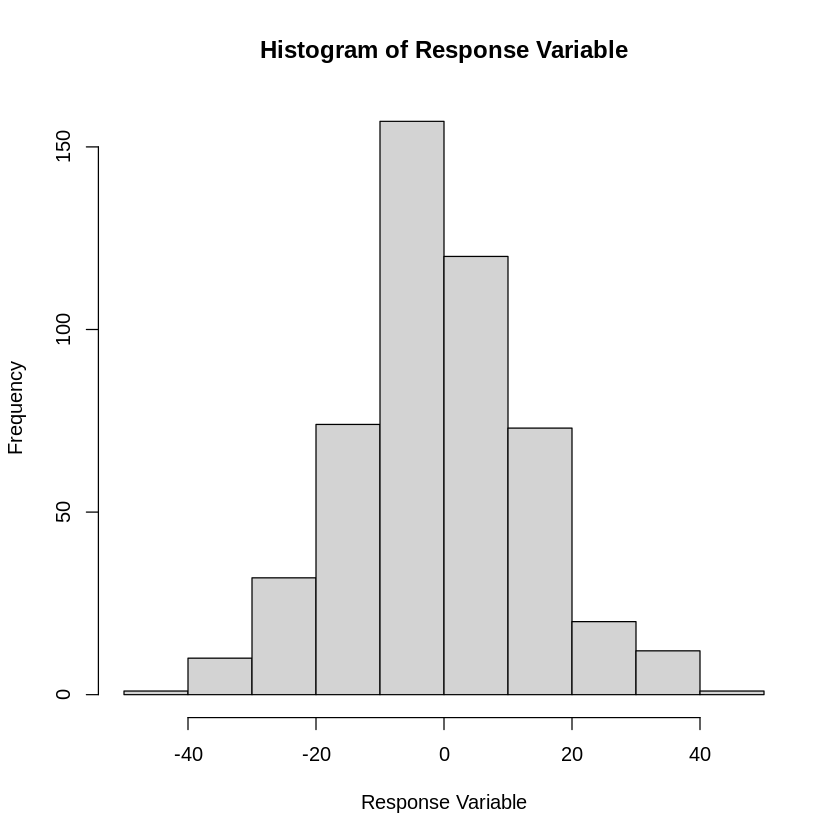

In [188]:
# Plot histogram
hist(train_data$happiness, main = "Histogram of Response Variable", xlab = "Response Variable")

In [189]:
# Select the first 10 columns
train_subset <- reg_train_data %>% select(1:10)

# Find the number of unique values in each of the selected columns
unique_values <- sapply(train_subset, function(x) length(unique(x)))

# Print the unique values for each column
print(unique_values)

                                                         gender 
                                                              3 
                                                         income 
                                                              9 
                    whatIsYourHeightExpressItAsANumberInMetresM 
                                                             10 
                doYouFeelASenseOfPurposeAndMeaningInYourLife104 
                                                              2 
howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki 
                                                              3 
      howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends 
                                                              4 
    doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded 
                                                              4 
howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV 
                         

#### MODELS (non-final) built

1. Linear Regression Models: <br>
  - base MLR (Multiple Linear Regression) model from Qn1. **SCOREBOARD RMSE : 5.24864**
  - only-important predictors based MLR model (just predictor columns - 2, 3, 6, 9, 11, 12, 25, 29, 41). These columns were selected based on how they affect the MLR's RMSE performance if excluded.
  - All encoded MLR Model - this included pre-processing the train and test data to have one-hot encoded columns (*columns*: 'gender', 'doYouFeelASenseOfPurposeAndMeaningInYourLife104',   'howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki',           'doYouFeelASenseOfPurposeAndMeaningInYourLife105') and label-encoded columns (*columns*: 'income', 'whatIsYourHeightExpressItAsANumberInMetresM', 'howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends', 'doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded', 'howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV', 'doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer'); next build a MLR model based on all predictors (encoded or not). **SCOREBOARD BEST RMSE : 11.12880**
  - Stepwise regression models (all kinds - forward/backward/both & AIC/BIC) one the above encoded data. **SCOREBOARD BEST RMSE : 5.99192**
  - MLRs built upon data that has encoding done on just a subset of the above listed ones. **SCOREBOARD BEST RMSE : 5.30991**

2. Random Forest Models: Models with different hyper-parameter tunings.BEST MODEL: no. of trees - 500; mtry - 41; nodesize - 25. **SCOREBOARD BEST RMSE : 5.64202**.

3. ANOVA (same as bas MLR). **SCOREBOARD BEST RMSE : 5.24684**.

4. GAM - Generalised Additive Mode. **SCOREBOARD BEST RMSE : 10.08203**.

5. SVM Models and tuned hyperparamters - BEST Model:hyperparameters linear kernel function; cost or tolerance for misclassification - 0.95; epsilon or margin of tolerance - 0.25. **SCOREBOARD BEST RMSE : 4.92364**.

6. Ridge|Lasso|Elastoc-Net Regression. **SCOREBOARD BEST RMSE - 5.10752**

#### FINAL MODEL - XG Boost

##### Fitting Data to model

- Here, I have one-hot encoded the first 10 columns ('chr' datatype) in both the train and test datasets.

In [190]:
# Specify the columns to one-hot encode
columns_to_encode <- c('gender', 'income', 'whatIsYourHeightExpressItAsANumberInMetresM',
                       'doYouFeelASenseOfPurposeAndMeaningInYourLife104',
                       'howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki',
                       'howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends',
                       'doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded',
                       'howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV',
                       'doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer',
                       'doYouFeelASenseOfPurposeAndMeaningInYourLife105')

# Create dummy variables
dummy_model <- dummyVars(~ gender + income + whatIsYourHeightExpressItAsANumberInMetresM +
                         doYouFeelASenseOfPurposeAndMeaningInYourLife104 +
                         howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki +
                         howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends +
                         doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded +
                         howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV +
                         doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer +
                         doYouFeelASenseOfPurposeAndMeaningInYourLife105, data = reg_train_data)

# Transform the data
data_transformed <- predict(dummy_model, newdata = reg_train_data) %>%
  as.data.frame()

# Bind the transformed data with the rest of the dataset
ohe_reg_train_data <- reg_train_data %>%
  select(-one_of(columns_to_encode)) %>%
  bind_cols(data_transformed)

# Verify the transformation
head(ohe_reg_train_data)

alwaysAnxious,alwaysStressed,alwaysAccountableAndResponsibleForYourActions,alwaysCalm,myBodyIsHypermobileAndLovesToMove,alwaysHaveFun,alwaysSerious,alwaysDepressed,alwaysLoveAndCareForYourself,extremelyGoodAbilityToSense,⋯,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVAt least once a week,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVMore than three times a week,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVNo,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVRarely,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferAlways,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferNever,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferRarely,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferSometimes,doYouFeelASenseOfPurposeAndMeaningInYourLife105No,doYouFeelASenseOfPurposeAndMeaningInYourLife105Yes
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-2,-1,2,1,-2,-2,0,0,2,2,⋯,0,0,1,0,0,1,0,0,0,1
-2,-2,1,1,2,1,0,-1,0,1,⋯,0,1,0,0,1,0,0,0,0,1
-1,-1,1,1,1,-1,-1,-1,1,1,⋯,0,0,0,0,0,0,0,1,0,1
0,1,2,-1,-2,-2,2,0,-1,0,⋯,0,0,1,0,1,0,0,0,1,0
1,1,1,-1,0,-1,1,0,-1,1,⋯,0,0,0,1,0,1,0,0,0,1
-1,-1,2,2,1,2,-1,-1,2,1,⋯,0,0,1,0,1,0,0,0,0,1


In [191]:
# Exclude column 'happiness' from data_matrix
encoded_data <- ohe_reg_train_data[, -"happiness"]
#head(encoded_data)

# outcome variable
outcome <- ohe_reg_train_data[["happiness"]]
#head(outcome)
typeof(outcome)

[1] "double"

In [192]:
# Create dummy variables
dummy_model_test <- dummyVars(~ gender + income + whatIsYourHeightExpressItAsANumberInMetresM +
                         doYouFeelASenseOfPurposeAndMeaningInYourLife104 +
                         howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki +
                         howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends +
                         doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded +
                         howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV +
                         doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer +
                         doYouFeelASenseOfPurposeAndMeaningInYourLife105, data = reg_test_data)

# Transform the test data
data_transformed <- predict(dummy_model_test, newdata = reg_test_data) %>%
  as.data.frame()

# Bind the transformed data with the rest of the dataset
ohe_reg_test_data <- reg_test_data %>%
  select(-one_of(columns_to_encode)) %>%
  bind_cols(data_transformed)

# Verify the transformation
head(ohe_reg_test_data)

alwaysAnxious,alwaysStressed,alwaysAccountableAndResponsibleForYourActions,alwaysCalm,myBodyIsHypermobileAndLovesToMove,alwaysHaveFun,alwaysSerious,alwaysDepressed,alwaysLoveAndCareForYourself,extremelyGoodAbilityToSense,⋯,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVAt least once a week,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVMore than three times a week,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVNo,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVRarely,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferAlways,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferNever,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferRarely,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferSometimes,doYouFeelASenseOfPurposeAndMeaningInYourLife105No,doYouFeelASenseOfPurposeAndMeaningInYourLife105Yes
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,0,2,0,1,1,-1,-1,1,1,⋯,1,0,0,0,1,0,0,0,0,1
2,2,1,-1,0,-1,1,1,-1,1,⋯,0,0,0,1,0,0,0,1,1,0
1,-1,1,1,-1,1,1,-2,2,1,⋯,0,0,0,1,1,0,0,0,0,1
-1,-1,2,0,1,-1,1,0,1,2,⋯,0,0,0,0,0,0,0,1,0,1
-1,-1,1,-1,-1,-1,0,-1,-1,0,⋯,1,0,0,0,1,0,0,0,0,1
-1,0,2,2,0,2,0,-1,1,2,⋯,0,1,0,0,1,0,0,0,0,1


##### Test-Train Split

- Here, I have divided the training data into train and test subsets (80/20 split), so that I can fairly compare different types of XG Boost models.

- This was primarly done so as to fairly compare 'gbtree' and 'gblinear' boosters applied onto the XG Boost regression model. It was found that 'gbtree' model gave better performance.

In [193]:
set.seed(333)
# train-test split
train_indices <- sample(1:nrow(ohe_reg_train_data), 0.8 * nrow(ohe_reg_train_data))
xgb_train <- ohe_reg_train_data[train_indices, ]
xgb_test <- ohe_reg_train_data[-train_indices, ]

X_train <- as.matrix(xgb_train[, -"happiness"])
y_train <- xgb_train[["happiness"]]
X_test <- as.matrix(xgb_test[, -"happiness"])
y_test <- xgb_test[["happiness"]]

# Create xgboost matrix
reg_dtrain <- xgb.DMatrix(data = X_train, label = y_train)
reg_dtrain

reg_dtest <- xgb.DMatrix(data = X_test, label = y_test)
reg_dtest

xgb.DMatrix  dim: 400 x 78  info: label  colnames: yes

xgb.DMatrix  dim: 100 x 78  info: label  colnames: yes

In [194]:
new_dtrain <- xgb.DMatrix(data = as.matrix(encoded_data), label = outcome)
new_dtrain

new_dtest <- xgb.DMatrix(data = as.matrix(ohe_reg_test_data))
new_dtest

xgb.DMatrix  dim: 500 x 78  info: label  colnames: yes

xgb.DMatrix  dim: 90 x 78  info: NA  colnames: yes

##### Developing the model

- The final model developed is a XG Boost Regression Model with the following specs: <br>
 **booster** : 'gbtree' - boosting model used here builds decision trees to build the model <br>
 **objective function** : 'reg:squarederror' or objective of the model - to reduce the error^2 of each tree built. <br>
 **learning rate** : 0.0994 <br>
 **maximum depth of each tree built** : 6 (max height of tree from start) <br>
 **Subsample ratio of the training instance** : 0.75 or 75% training data sued to build each tree. <br>
 **Subsample of columns when building each tree** : 0.75 or 75% of total no. of predictor columsn used in building each tree. <br>
 **No. of boosting iterations** : 500

In [195]:
# help reproduce the result
set.seed(333)

# Set parameters for XGBoost
params <- list(
  booster = "gbtree",
  objective = "reg:squarederror",
  eta = 0.0994,             # Learning rate
  max_depth = 6,          # Maximum depth of a tree
  subsample = 0.75,        # Subsample ratio of the training instance
  colsample_bytree = 0.75 # Subsample ratio of columns when constructing each tree
  #lambda = 0,            # For linear booster, L2 regularisation
  #alpha = 0              # For linear booster, L1 regularisation
)


# Train the XGBoost model
xgb_model <- xgboost(params = params, data = reg_dtrain, nrounds = 500, verbose = FALSE) #100

# Check rMSE
xgb_predictions <- predict(xgb_model, reg_dtest)
xgb_residuals <- y_test - xgb_predictions
xgb_se <- xgb_residuals^2
xgb_rmse <- sqrt(mean(xgb_se))

cat("XGB Model rMSE:", xgb_rmse)

XGB Model rMSE: 6.476166

**NOTE**:
- The RMSE value shown above is slightly lower than what I got when I originally built this model on Kaggle. This might affect the final predictions but the leaderboard score for this must just be lower than what I finally got.

- My best score on the public leaderboard is **4.41144**. I obtained this score for the predictions of the model built above.

##### Predicting the test 'happiness' value

In [196]:
final_xgb_model <- xgboost(params = params, data = new_dtrain, nrounds = 500, verbose = FALSE)

xgb_test_predictions <- predict(final_xgb_model, new_dtest)
head(xgb_test_predictions)

[1]  -9.3528461 -25.6016617  10.8193560  16.4974327   0.2129099  28.2623920

In [197]:
# Build your final model here, use additional coding blocks if you need to
fin.mod <- final_xgb_model

In [198]:
# Load in the test data.
test <- new_dtest
# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
pred.label <- predict(fin.mod, test)
# put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
write.csv(
    data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),
    "RegressionPredictLabel_xgb2.csv",
    row.names = F
)

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

tryCatch(
    {
        source("../supplimentary.R")
    },
    error = function(e){
        source("supplimentary.R")
    }
)

truths <- tryCatch(
    {
        read.csv("../regression_test_label.csv")
    },
    error = function(e){
        read.csv("regression_test_label.csv")
    }
)


RMSE.fin <- rmse(pred.label, truths$x)
cat(paste("RMSE is", RMSE.fin))

************************

# Part 2 Classification (50 Marks)

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual, but this time we want to predict a categorical score for perfect mental health, rather than a continuous score. You need to build 5-class classification models to optimally predict the variable in the survey dataset called 'perfectMentalHealth' based on any, or all, of the other survey question responses.

You have been provided with two datasets, ```classification_train.csv``` and ```classification_test.csv```. Using these datasets, you hope to build a model that can predict 'perfectMentalHealth' using the other variables. ```classification_train.csv``` comes with the ground-truth target label (i.e. 'perfectMentalHealth' happiness classes) whereas `classification_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict 'perfectMentalHealth'. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. E.g. the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

This question will also be in the form of a [Kaggle competition](https://www.kaggle.com/t/968d3b346acb47779771f47785c39e62) among students to find out who has the best model.

**NOTE:**
- The only model I've explored is XG Boost here, owing to submission dealine timing. I've tried to improve upon the model and find the best possible set of hyperparameters for just this one model.

#### BEST Model - XG Boost

In [200]:
library(data.table)
library(xgboost)
library(caret)
library(data.table)
library(ggplot2)
library(lattice)
library(dplyr)

##### Inspecting Data

In [201]:
clas_train_data <- fread("classification_train.csv")

clas_test_data <- fread("classification_test.csv")

In [202]:
summary(clas_train_data)

    gender             income         
 Length:500         Length:500        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
 whatIsYourHeightExpressItAsANumberInMetresM
 Length:500                                 
 Class :character                           
 Mode  :character                           
                                            
                                            
                                            
 doYouFeelASenseOfPurposeAndMeaningInYourLife104
 Length:500                                     
 Class :character                               
 Mode  :character                               
                                                
                                                
                                                
 howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki
 Len

In [203]:
str(clas_train_data)

Classes ‘data.table’ and 'data.frame':	500 obs. of  43 variables:
 $ gender                                                         : chr  "Female" "Female" "Male" "Male" ...
 $ income                                                         : chr  "10k - 15k" "120k - 150k" "0 - 10k" "80k - 120k" ...
 $ whatIsYourHeightExpressItAsANumberInMetresM                    : chr  "155 - 160" "165 - 170" "160 - 165" "160 - 165" ...
 $ doYouFeelASenseOfPurposeAndMeaningInYourLife104                : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki: chr  "They complement each other" "They conflict" "They complement each other" "They complement each other" ...
 $ howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends      : chr  "Rarely" "Sometimes" "Rarely" "Never" ...
 $ doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded    : chr  "Yes, I have both" "Yes, I have both" "Yes, I have both" "No" ...
 $ howOftenDoYouParticipateInSocialActi

In [204]:
xgb_train_data <- clas_train_data

print(class(xgb_train_data))
head(xgb_train_data)


[1] "data.table" "data.frame"


gender,income,whatIsYourHeightExpressItAsANumberInMetresM,doYouFeelASenseOfPurposeAndMeaningInYourLife104,howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki,howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends,doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV,doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer,doYouFeelASenseOfPurposeAndMeaningInYourLife105,⋯,alwaysEngageInPreparingAndUsingYourSkillsAndTalentsInOrderToGai,alwaysMakingProgress,extremelyGoodCommunicator,iDontFeelParticularlyPleasedWithTheWayIAm,iFeelThatLifeIsVeryRewarding,iHaveVeryWarmFeelingsTowardsAlmostEveryone,iAmNotParticularlyOptimisticAboutTheFuture,lifeIsGood,iLaughALot,iDontThinkILookAttractive
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Female,10k - 15k,155 - 160,Yes,They complement each other,Rarely,"Yes, I have both",More than three times a week,Sometimes,Yes,⋯,2,2,1,2,2,2,-2,1,0,-2
Female,120k - 150k,165 - 170,Yes,They conflict,Sometimes,"Yes, I have both",More than three times a week,Sometimes,Yes,⋯,1,1,0,-2,1,0,-2,2,0,-1
Male,0 - 10k,160 - 165,Yes,They complement each other,Rarely,"Yes, I have both",More than three times a week,Never,Yes,⋯,-2,0,1,2,-2,0,-2,-2,1,0
Male,80k - 120k,160 - 165,Yes,They complement each other,Never,No,At least once a month,Never,No,⋯,1,2,2,2,0,0,-2,0,0,-2
Female,120k - 150k,170 - 175,Yes,They are separate,Never,"Yes, I have both",At least once a week,Always,Yes,⋯,2,0,0,0,1,0,0,0,1,-2
Female,0 - 10k,160 - 165,Yes,They complement each other,Sometimes,"Yes, I have both",At least once a week,Rarely,Yes,⋯,1,1,0,-2,0,-2,0,0,0,1


##### One-hot encoding character ('chr') columns in training data

In [205]:
# Specify the columns to one-hot encode
columns_to_encode <- c('gender', 'income', 'whatIsYourHeightExpressItAsANumberInMetresM',
                       'doYouFeelASenseOfPurposeAndMeaningInYourLife104',
                       'howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki',
                       'howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends',
                       'doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded',
                       'howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV',
                       'doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer',
                       'doYouFeelASenseOfPurposeAndMeaningInYourLife105')

# Create dummy variables
dummy_model <- dummyVars(~ gender + income + whatIsYourHeightExpressItAsANumberInMetresM +
                         doYouFeelASenseOfPurposeAndMeaningInYourLife104 +
                         howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki +
                         howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends +
                         doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded +
                         howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV +
                         doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer +
                         doYouFeelASenseOfPurposeAndMeaningInYourLife105, data = xgb_train_data)

# Transform the data
data_transformed <- predict(dummy_model, newdata = xgb_train_data) %>%
  as.data.frame()

# Bind the transformed data with the rest of the dataset
ohe_clas_train_data <- xgb_train_data %>%
  select(-one_of(columns_to_encode)) %>%
  bind_cols(data_transformed)

# Verify the transformation
head(ohe_clas_train_data)

perfectMentalHealth,alwaysAnxious,alwaysStressed,alwaysAccountableAndResponsibleForYourActions,alwaysCalm,myBodyIsHypermobileAndLovesToMove,alwaysHaveFun,alwaysSerious,alwaysDepressed,alwaysLoveAndCareForYourself,⋯,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVAt least once a week,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVMore than three times a week,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVNo,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVRarely,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferAlways,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferNever,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferRarely,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferSometimes,doYouFeelASenseOfPurposeAndMeaningInYourLife105No,doYouFeelASenseOfPurposeAndMeaningInYourLife105Yes
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,-1,-2,1,0,-2,2,-2,-1,2,⋯,0,1,0,0,0,0,0,1,0,1
1,0,1,1,-2,0,1,0,-2,2,⋯,0,1,0,0,0,0,0,1,0,1
0,2,1,0,-2,-2,-2,0,0,-1,⋯,0,1,0,0,0,1,0,0,0,1
-2,0,0,2,2,-2,0,1,0,2,⋯,0,0,0,0,0,1,0,0,1,0
1,-2,1,2,-2,1,1,-2,-2,1,⋯,1,0,0,0,1,0,0,0,0,1
-2,-1,-1,1,-2,-2,0,-2,-1,2,⋯,1,0,0,0,0,0,1,0,0,1


##### Defining the 'x' and 'y' inputs for XGBoost Model

In [206]:
# Exclude column 'perfectMentalHealth' from data_matrix
data_matrix <- ohe_clas_train_data[, -"perfectMentalHealth"]

# Check class and structure of data_matrix
typeof(data_matrix)

class(as.matrix(data_matrix))
typeof(as.matrix(data_matrix))

[1] "list"

[1] "matrix" "array"

[1] "double"

In [207]:
# Seprate out the outcome variable to be used as labels in XG Boost model
labels <- xgb_train_data$perfectMentalHealth + 2
typeof(labels)

# Create xgboost matrix
clas_dtrain <- xgb.DMatrix(data = as.matrix(data_matrix), label = labels)
clas_dtrain

[1] "double"

xgb.DMatrix  dim: 500 x 78  info: label  colnames: yes

Here, I've defined the labels as 'perfectMentalHealth' + 2 because XG Boost requires its outcome classes to start from '0' and since this outcome has the following classes: -2, -1, 0, 1, 2.

##### XG Boost Model Training

Model Hyperparameters:
- Booster model - 'gbtree' (same as for my regression final model)
- objective function of learning task: "multi:softmax" - perform multi-class classification based on softmax function's prob. distribution over classes for each instance.
- num_classes: outcome no. of classes to predict.
- evaluation metric: 'mlogloss' - help model learn how the predicted outcome class differes from actual outcome class during training.
- max_depth: max depth of decision trees built.
- min_child_weight: no. of classifications needed in each valid child (weight).
- eta - learning rate of the model during training.
- gamma - min. lass reduction needed to make further partition on a leaf node during building of decision trees.
- colsample_bytree - subsample ratio of columns when constructing each decision tree.
- subsample - subsample ratio of the training instance

In [208]:
# help reproduce the result
set.seed(333)

# Set parameters for XGBoost
params <- list(
  objective = "multi:softmax",  # for multi-class classification
  num_class = 5,                # number of classes in outcome variable
  eval_metric = "mlogloss",     # metric for evaluation
  max_depth = 8,                # maximum depth of trees
  min_child_weight = 3,         # min sum of instance weight in a child node
  eta = 0.1,                    # learning rate
  gamma = 0.3,                  # minimum loss reduction required to make a further partition
  colsample_bytree = 0.75,      # subsample ratio of columns when constructing each tree
  subsample = 0.75              # subsample ratio of the training instance
)


# Train the XGBoost model
clas_xgb_model <- xgboost(params = params, data = clas_dtrain, nrounds = 100, verbose = FALSE)

In [209]:
# Make predictions on the test set
predictions <- predict(clas_xgb_model, clas_dtrain) - 2

# Evaluate model performance
accuracy <- mean(predictions == ohe_clas_train_data$perfectMentalHealth)
cat("Accuracy:", accuracy, "\n")

Accuracy: 1 


Here, while making predictions I'm subracting two as the classes are to be reset to start from -2 instead of 0.

- please note that I've calculated the accuracy on the training dataset outcomes itself to help check when the hyperparamter settings cause the model to overfit or underfit

##### Preparing the test data for predictions

In [210]:
# Specify the columns to one-hot encode
columns_to_encode <- c('gender', 'income', 'whatIsYourHeightExpressItAsANumberInMetresM',
                       'doYouFeelASenseOfPurposeAndMeaningInYourLife104',
                       'howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki',
                       'howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends',
                       'doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded',
                       'howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV',
                       'doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer',
                       'doYouFeelASenseOfPurposeAndMeaningInYourLife105')

# Create dummy variables
dummy_model_test <- dummyVars(~ gender + income + whatIsYourHeightExpressItAsANumberInMetresM +
                         doYouFeelASenseOfPurposeAndMeaningInYourLife104 +
                         howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki +
                         howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends +
                         doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded +
                         howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV +
                         doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer +
                         doYouFeelASenseOfPurposeAndMeaningInYourLife105, data = clas_test_data)

# Transform the data
data_transformed <- predict(dummy_model_test, newdata = clas_test_data) %>%
  as.data.frame()

# Bind the transformed data with the rest of the dataset
ohe_clas_test_data <- clas_test_data %>%
  select(-one_of(columns_to_encode)) %>%
  bind_cols(data_transformed)

# Verify the transformation
head(ohe_clas_test_data)

alwaysAnxious,alwaysStressed,alwaysAccountableAndResponsibleForYourActions,alwaysCalm,myBodyIsHypermobileAndLovesToMove,alwaysHaveFun,alwaysSerious,alwaysDepressed,alwaysLoveAndCareForYourself,extremelyGoodAbilityToSense,⋯,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVAt least once a week,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVMore than three times a week,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVNo,howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsVRarely,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferAlways,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferNever,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferRarely,doYouFeelComfortableEngagingInConversationsWithPeopleFromDifferSometimes,doYouFeelASenseOfPurposeAndMeaningInYourLife105No,doYouFeelASenseOfPurposeAndMeaningInYourLife105Yes
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,-1,1,1,0,0,0,-1,1,1,⋯,1,0,0,0,1,0,0,0,0,1
-1,-1,1,1,0,0,0,-1,1,1,⋯,1,0,0,0,1,0,0,0,0,1
-1,-1,1,1,0,0,0,-1,1,1,⋯,1,0,0,0,1,0,0,0,0,1
-1,-1,1,1,0,0,0,-1,1,1,⋯,1,0,0,0,1,0,0,0,0,1
-2,-2,1,1,0,1,-1,-1,2,1,⋯,1,0,0,0,0,0,0,1,0,1
-1,0,1,1,1,1,-1,-1,1,1,⋯,1,0,0,0,1,0,0,0,0,1


##### Test Predictions Generation

In [211]:
# Build the actual test set for the model
clas_dtest <- xgb.DMatrix(data = as.matrix(ohe_clas_test_data))
clas_dtest

# Make predictions on the test set
test_predictions <- predict(clas_xgb_model, clas_dtest) - 2
test_predictions

xgb.DMatrix  dim: 95 x 78  info: NA  colnames: yes

[1]  1  1  1  1  1  1 -2 -1  0 -2 -1  1  0  0  0  0  0  1  0  2 -1  2  2  0  0
[26]  1  0 -1  0  0  2  0  1 -1  0  0  0  1  1  0  1  1 -1  1  2  0 -1  0  0  0
[51]  0  0  0  0 -1  0  0 -2 -1  1  0 -1 -1  0  0  1  0  0  1 -1  0  0 -1  1  0
[76]  0  0  1  1  1  0  0  0  0  0  1  1  2  0  0  0  0 -2  1  1

**NOTE**:
- My public leaderboard score for the model built above is **0.59583**.

In [212]:
# Load in the train and test classification data.
test <- clas_dtest

# Build your final model here, use additional coding blocks if you need to
fin.mod <- clas_xgb_model

# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
pred.label <- predict(fin.mod, test) - 2
# put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
write.csv(
    data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),
    "ClassificationPredictLabel_XGBoost_tunedFinal.csv",
    row.names = F
)

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

truths <- tryCatch(
    {
        read.csv("../classification_test_label.csv")
    },
    error = function(e){
        read.csv("classification_test_label.csv")
    }
)

f1_score <- F1_Score(truths$x, pred.label)
cat(paste("f1_score is", f1_score))